### Deep Learning-Based Large-Scale Automatic Satellite Crosswalk Classification

Download the model (e.g., world, america, europe, italy, etc.) you want to test [here](https://github.com/rodrigoberriel/satellite-crosswalk-classification/blob/master/models/).

BibTeX:

    @article{berriel2017grsl,
      Author  = {Rodrigo F. Berriel and Andre T. Lopes and Alberto F. de Souza and Thiago Oliveira-Santos},
      Title   = {{Deep Learning Based Large-Scale Automatic Satellite Crosswalk Classification}},
      Journal = {IEEE Geoscience and Remote Sensing Letters},
      Year    = {2017},
      DOI     = {10.1109/LGRS.2017.2719863},
      ISSN    = {1545-598X}
    }

In [1]:
import os
import caffe
import numpy as np
import matplotlib.pyplot as plt

# set display defaults
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['image.interpolation'] = 'nearest'

# set caffe mode
caffe.set_mode_cpu()

In [2]:
model_name = "world"
BATCH_SIZE = 4

model_def = "../models/deploy.prototxt"
model_weights = "../models/{0:}/{0:}.caffemodel".format(model_name)
model_mean = "../models/{0:}/mean.binaryproto".format(model_name)
labels = ['No-Crosswalk', 'Crosswalk']

In [3]:
images_fname = [
    os.path.join(root, fname) 
    for root, _, files in os.walk('../samples') 
    for fname in files
]
images = [caffe.io.load_image(image_fname) for image_fname in images_fname]

In [4]:
mean_values = [73, 78, 77]  # default, from world model
with open(model_mean, 'rb') as meanfile:
    blob = caffe.proto.caffe_pb2.BlobProto()
    blob.ParseFromString(meanfile.read())
    mean_values = np.array(caffe.io.blobproto_to_array(blob))[0]
    mean_values = mean_values.transpose(1, 2, 0)
    mean_values = caffe.io.resize_image(mean_values, (224, 224), 2)
    mean_values = mean_values.transpose(2, 0, 1)

In [5]:
from caffe.classifier import Classifier
c = Classifier(
    model_def, 
    model_weights, 
    mean=mean_values,
    raw_scale=255,
    channel_swap=(2,1,0),
    image_dims=(256, 256)
)
c.blobs['data'].reshape(BATCH_SIZE, 3, 224, 224)
c.blobs['softmax'].reshape(BATCH_SIZE, 3)
c.reshape()

In [6]:
cls = c.predict(images)

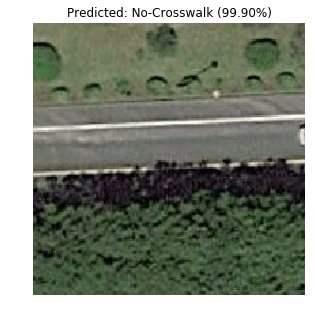

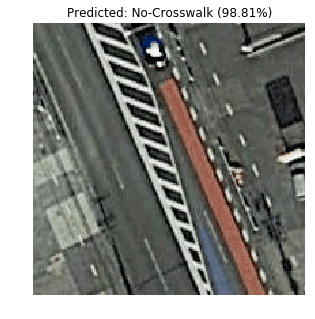

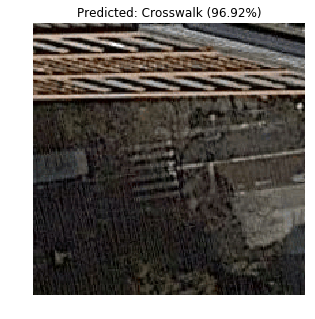

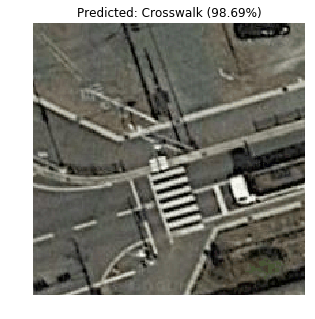

In [7]:
for i in range(BATCH_SIZE):
    class_max = cls[i, :].argmax()
    plt.imshow(images[i])
    plt.title('Predicted: {} ({:.2f}%)'.format(labels[class_max], 100 * cls[i, class_max]))
    plt.axis('off')
    plt.show()